In [30]:
# Function to plot the change in theta_mean for a given duration
def plot_change_variable_for_duration(ax, variable, duration, df_changes, tbo_vals, cmap = 'viridis'):
    # Filter the data for the given duration
    change_R_data = df_changes[df_changes['sampling_duration'] == float(duration)][['gauge_num', variable]]
    
    # Get longitude and latitude from gauge locations
    gauge_locs = change_R_data['gauge_num'].copy()

    # Now index into gauge_locations with the copied values
    lon = tbo_vals.loc[gauge_locs, 'Lon']
    lat = tbo_vals.loc[gauge_locs, 'Lat']
    
    # Plot the background outline of Great Britain
    gb_outline.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=1)
    
    # Scatter plot for theta change
    scatter = ax.scatter(lon, lat, c=change_R_data[variable], cmap=cmap, edgecolor=None, s= 8, alpha=0.9)
    ax.set_title(f'{variable} (Duration: {duration} hours)')
    #ax.set_xlabel('Longitude')
    #ax.set_ylabel('Latitude')
    ax.set_xticklabels([]); ax.set_yticklabels([])
    
    # Create a color bar that is scaled to the size of the plot
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)  # Control the width and padding of the colorbar
    plt.colorbar(scatter, cax=cax, label=f'{variable}')   
    
    
# def plot_change_variable_for_duration(ax, variable, duration, df_changes, tbo_vals, cmap='viridis'):
#     # Filter the data for the given duration
#     change_R_data = df_changes[df_changes['dur_for_which_this_is_amax'] == float(duration)][['gauge_num', variable]]
    
#     # Get longitude and latitude from gauge locations
#     gauge_locs = change_R_data['gauge_num'].copy()

#     # Now index into gauge_locations with the copied values
#     lon = tbo_vals.loc[gauge_locs, 'Lon']
#     lat = tbo_vals.loc[gauge_locs, 'Lat']
    
#     # Plot the background outline of Great Britain
#     gb_outline.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=1)
    
#     # Scatter plot for theta change with vmin and vmax centered around 50
#     vmin = 0 - 10  # Lower limit (25 units below 50)
#     vmax = 0 + 10  # Upper limit (25 units above 50)
#     scatter = ax.scatter(lon, lat, c=change_R_data[variable], cmap=cmap, edgecolor=None, s=8, alpha=1, vmin=vmin, vmax=vmax)
    
#     ax.set_title(f'Sampling dur: {duration} hours')
#     ax.set_xticklabels([]) 
#     ax.set_yticklabels([])

#     # Create a color bar that is scaled to the size of the plot
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.05)  # Control the width and padding of the colorbar
#     plt.colorbar(scatter, cax=cax, label=f'{variable}') 

In [3]:
import os
import numpy as np
import re
import pickle
import sys
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)
import seaborn as sns
import scipy.stats as stats
import datetime
import geopandas as gpd
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors
from statsmodels.graphics.mosaicplot import mosaic

sys.path.insert(1, '../')
from SeasonalPlot_Functions import *
from LoadingPlot_Functions import *

In [4]:
home_dir = '/nfs/a319/gy17m2a/PhD/'
home_dir2 = '/nfs/a161/gy17m2a/PhD/'

In [5]:
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for Great Britain
gb_outline = gdf[(gdf.name == "United Kingdom")]

In [6]:
quintile_mapping = {1: 'F2', 2: 'F1', 3: 'C', 4: 'B1', 5: 'B2'}
quintile_mapping_thirds = {1: 'F', 2: 'C', 3: 'B'}
quintile_cats = ['F2','F1', 'C', 'B1', 'B2']
color_mapping = {'F2': (0.0, 0.0, 1.0, 0.6),   'F1': (0.0, 0.6902, 1.0, 0.6),
    'C': (0.5, 0.5, 0.5, 0.6), 'B1': (0.8039, 0.0, 0.0, 0.6),'B2': (0.5451, 0.0, 0.0, 0.6)} 

In [7]:
tbo_vals = pd.read_csv(home_dir + 'datadir/RainGauge/interarrival_thresholds_CDD_noMissing.txt')
tbo_vals = tbo_vals[tbo_vals['Lon']!=-999.0]
tbo_vals['gauge_num'] = tbo_vals.index

### Read in data

In [8]:
df_changes_all=pd.read_csv(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/grouped_by_gauge_samplingdur_changes_allevents.csv")
df_changes_byduration=pd.read_csv(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/grouped_by_gauge_samplingdur_changes_new.csv")

In [9]:
df_changes_all_season=pd.read_csv(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/grouped_by_gauge_samplingdur_season_changes_allevents.csv")

In [10]:
df_changes_all_summer = df_changes_all_season[df_changes_all_season['season']=='Summer']
df_changes_all_autumn = df_changes_all_season[df_changes_all_season['season']=='Autumn']

In [11]:
df_changes_season =pd.read_csv(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/grouped_by_gauge_samplingdur_season_changes_new.csv")

In [12]:
df_changes_summer =df_changes_season[df_changes_season['season']=="Summer"]
df_changes_autumn =df_changes_season[df_changes_season['season']=="Autumn"]

In [13]:
df_long=pd.read_csv(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/all_events_characteristics.csv")
df_long = df_long[df_long['duration'] >=1.5]
present=df_long[df_long['Climate']=='Present']
future=df_long[df_long['Climate']=='Future']

nimrod = pd.read_csv(home_dir + f"ProcessedData/AMAX_Events/NIMROD_30mins/all_events_characteristics.csv")
nimrod = nimrod[nimrod['duration'] >=1.5]

### Remove events with less than 3 data points

In [14]:
my_dict = {'Present (UKCP18)' :present, 'Future (UKCP18)':future,
           'NIMROD':nimrod}
short_ids = ['Present (UKCP18)', 'Future (UKCP18)', 'NIMROD']

In [15]:
# df_changes_1h = df_changes[df_changes['sampling_duration']==1]
# present=df_changes_1h[df_changes_1h['Climate']=='Present']
# future=df_changes_1h[df_changes_1h['Climate']=='Future']


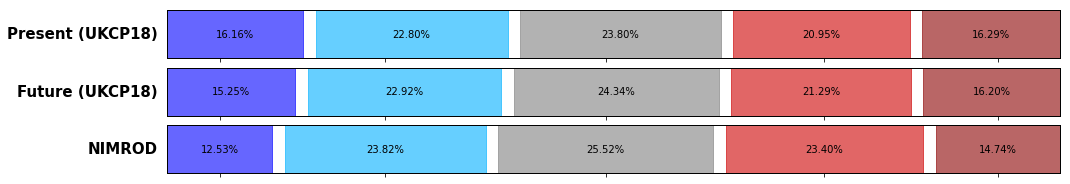

In [16]:
# Create the subplots
fig, axs = plt.subplots(nrows=len(short_ids), figsize=(16, 3), sharex=True)

# Loop over each id and create the plots
for i, id in enumerate(short_ids):
    create_single_variable_mosaic_plot_pctlabels(axs[i], my_dict[id], 'Loading_profile_molly', 
        quintile_cats, color_mapping,  short_ids[i])

# Add the overall title
# fig.suptitle('All events', fontweight="bold", fontsize=20);

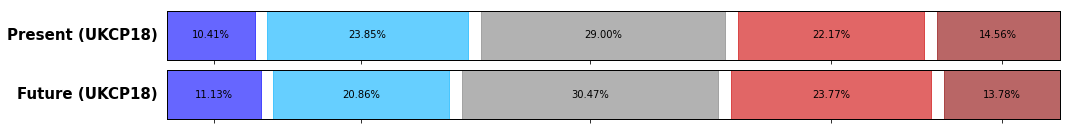

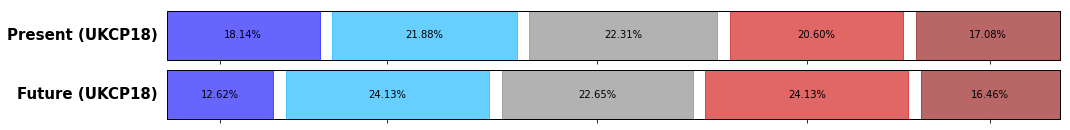

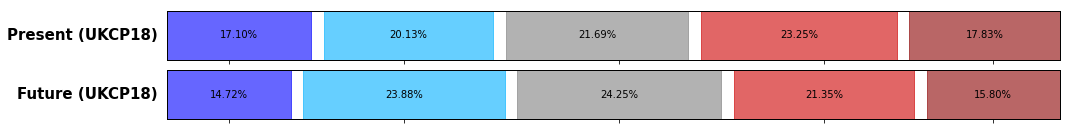

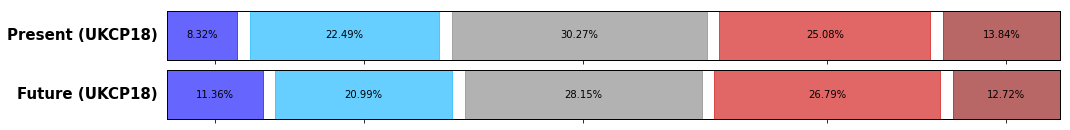

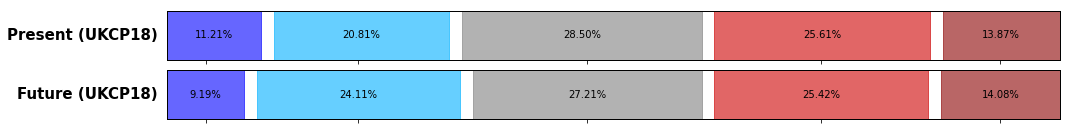

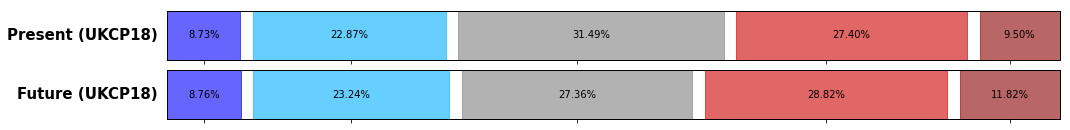

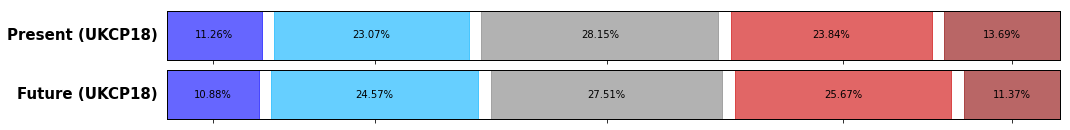

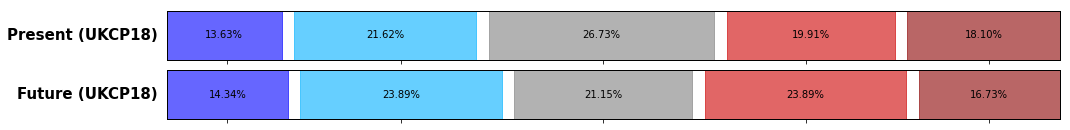

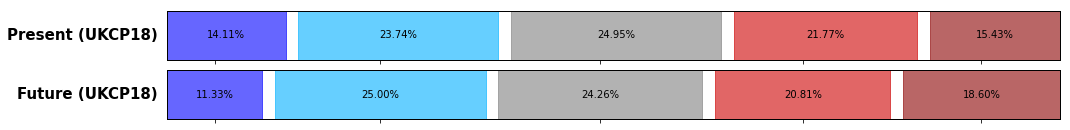

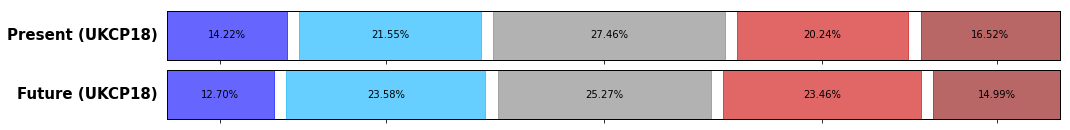

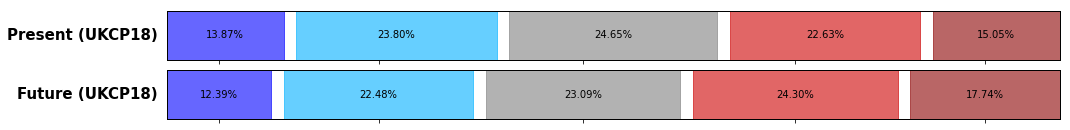

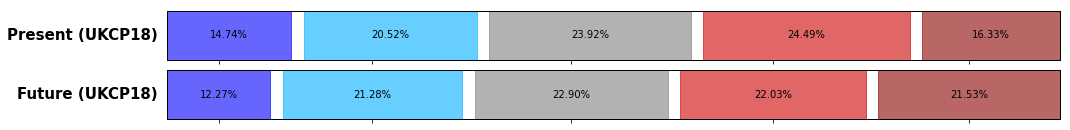

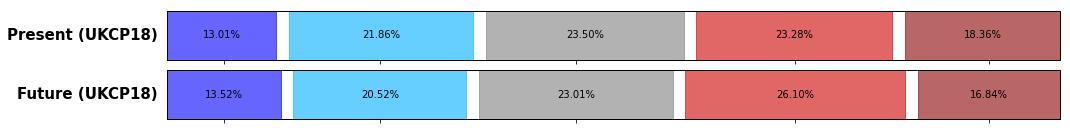

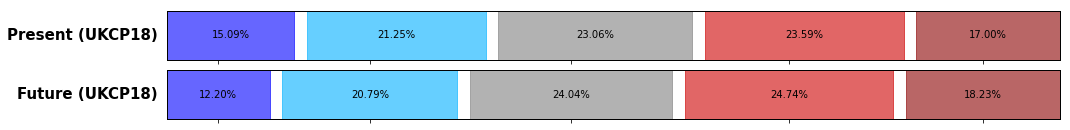

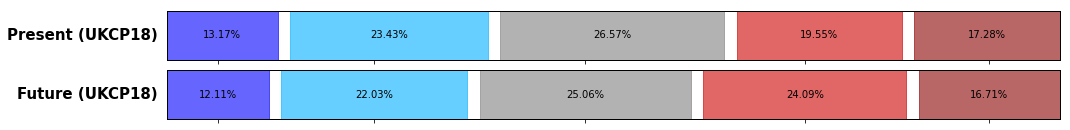

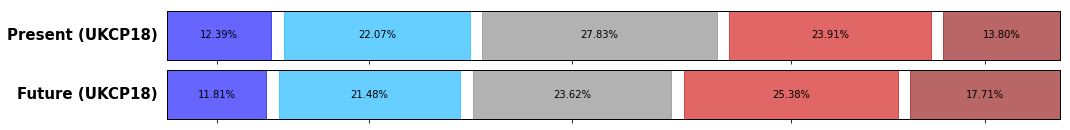

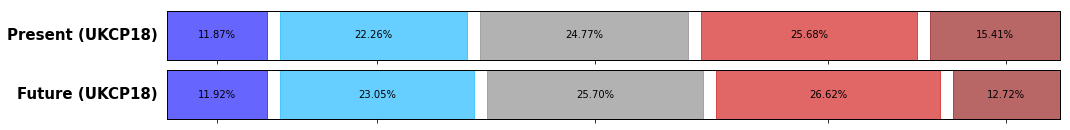

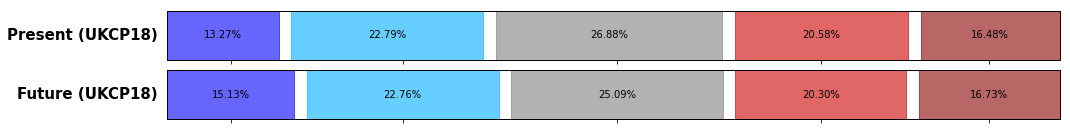

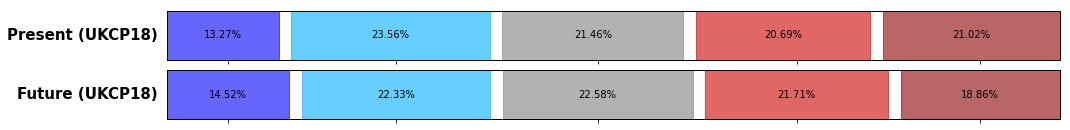

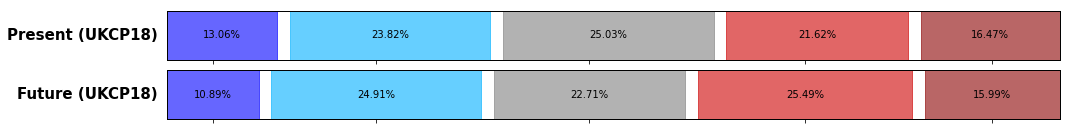

In [17]:
for gauge_num in range(1000,1020):
    present_thisgauge=present[present['gauge_num']==gauge_num]
    future_thisgauge=future[future['gauge_num']==gauge_num]
    short_ids = ['Present (UKCP18)', 'Future (UKCP18)']
    my_dict = {'Present (UKCP18)' :present_thisgauge, 'Future (UKCP18)':future_thisgauge}

    # Create the subplots
    fig, axs = plt.subplots(nrows=len(short_ids), figsize=(16, 2), sharex=True)

    # Loop over each id and create the plots
    for i, id in enumerate(short_ids):
        create_single_variable_mosaic_plot_pctlabels(axs[i], my_dict[id], 'Loading_profile_molly', 
            quintile_cats, color_mapping,  short_ids[i])


# D50 analysis

## Present + future + change (all durations lumped)  

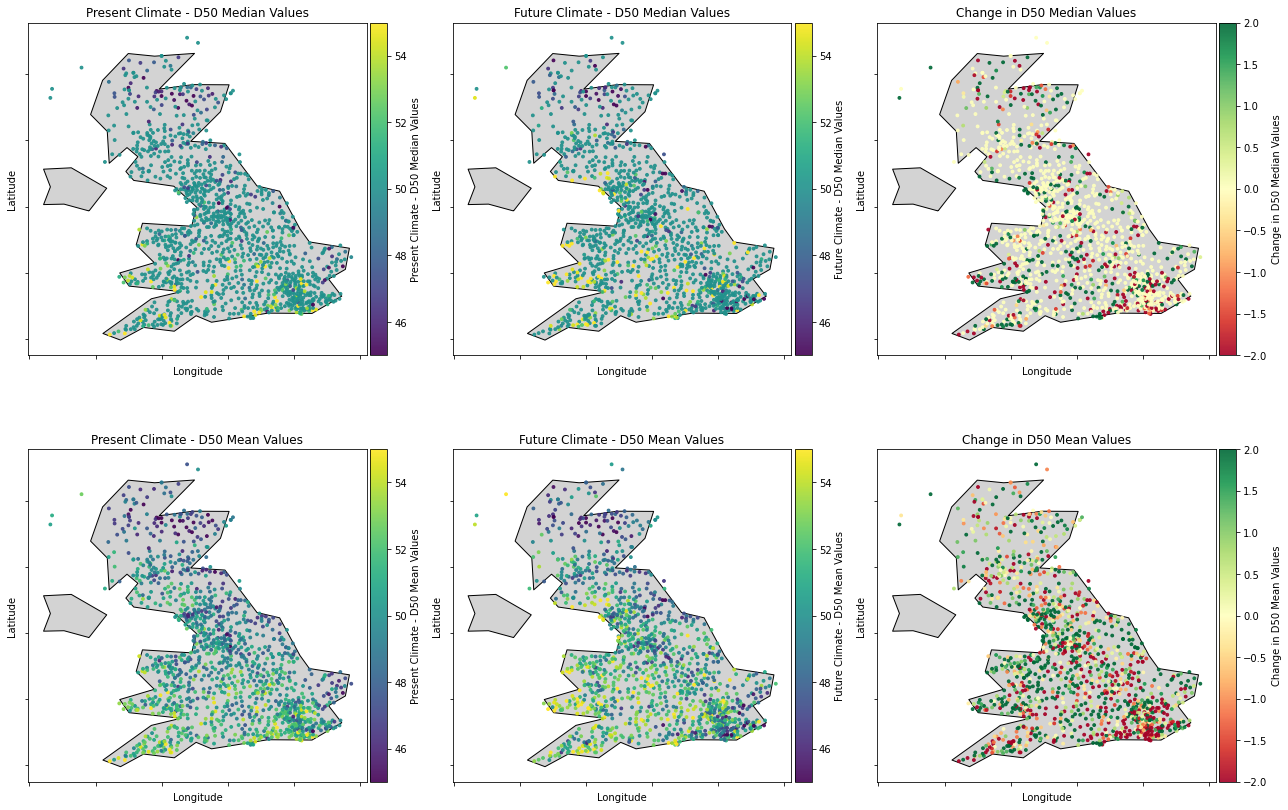

In [18]:
# Create a figure and axes for the six subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Present Climate 
present_medianD50_data = df_changes_all_summer[['gauge_num', 'D50_median_present']].copy()
present_medianD50_data['Climate'] = 'present'  # Add a Climate column for clarity
# Future Climate
future_medianD50_data = df_changes_all_summer[['gauge_num', 'D50_median_future']].copy()
future_medianD50_data['Climate'] = 'future'  # Add a Climate column for clarity

global_min = min(present_medianD50_data['D50_median_present'].min(),
    future_medianD50_data['D50_median_future'].min())

global_max = max(present_medianD50_data['D50_median_present'].max(),
    future_medianD50_data['D50_median_future'].max())


plot_values_on_map(axes[0, 0], present_medianD50_data, 'Present Climate - D50 Median Values', tbo_vals,
                   'D50_median_present', 45, 55)
plot_values_on_map(axes[0, 1], future_medianD50_data, 'Future Climate - D50 Median Values', tbo_vals, 
                    'D50_median_future', 45, 55)

# # Change 
change_medianD50_data = df_changes_all_summer[['gauge_num', 'D50_median_diff']].copy()
change_medianD50_data['Climate'] = 'change'  # Add a Climate column for clarity
plot_values_on_map(axes[0, 2], change_medianD50_data, 'Change in D50 Median Values', tbo_vals, 'D50_median_diff', 
                   vmin=-2, vmax=+2, cmap = 'RdYlGn')


present_meanD50_data = df_changes_all_summer[['gauge_num', 'D50_mean_present']].copy()
present_meanD50_data['Climate'] = 'present'  # Add a Climate column for clarity
future_meanD50_data = df_changes_all_summer[['gauge_num', 'D50_mean_future']].copy()
future_meanD50_data['Climate'] = 'present'  # Add a Climate column for clarity

global_min = min(present_meanD50_data['D50_mean_present'].min(),
    future_meanD50_data['D50_mean_future'].min())

global_max = max(present_meanD50_data['D50_mean_present'].max(),
    future_meanD50_data['D50_mean_future'].max())


plot_values_on_map(axes[1, 0], present_meanD50_data, 'Present Climate - D50 Mean Values', tbo_vals, 
                   'D50_mean_present', 45, 55)
plot_values_on_map(axes[1, 1], future_meanD50_data, 'Future Climate - D50 Mean Values', tbo_vals, 
                    'D50_mean_future', 45, 55)

# # Change 
change_meanD50_data = df_changes_all_summer[['gauge_num', 'D50_mean_diff']].copy()
change_meanD50_data['Climate'] = 'change'  # Add a Climate column for clarity
plot_values_on_map(axes[1, 2], change_meanD50_data, 'Change in D50 Mean Values', tbo_vals, 'D50_mean_diff', 
                   vmin=-2, vmax=+2, cmap = 'bwr')

# Adjust layout
plt.tight_layout()


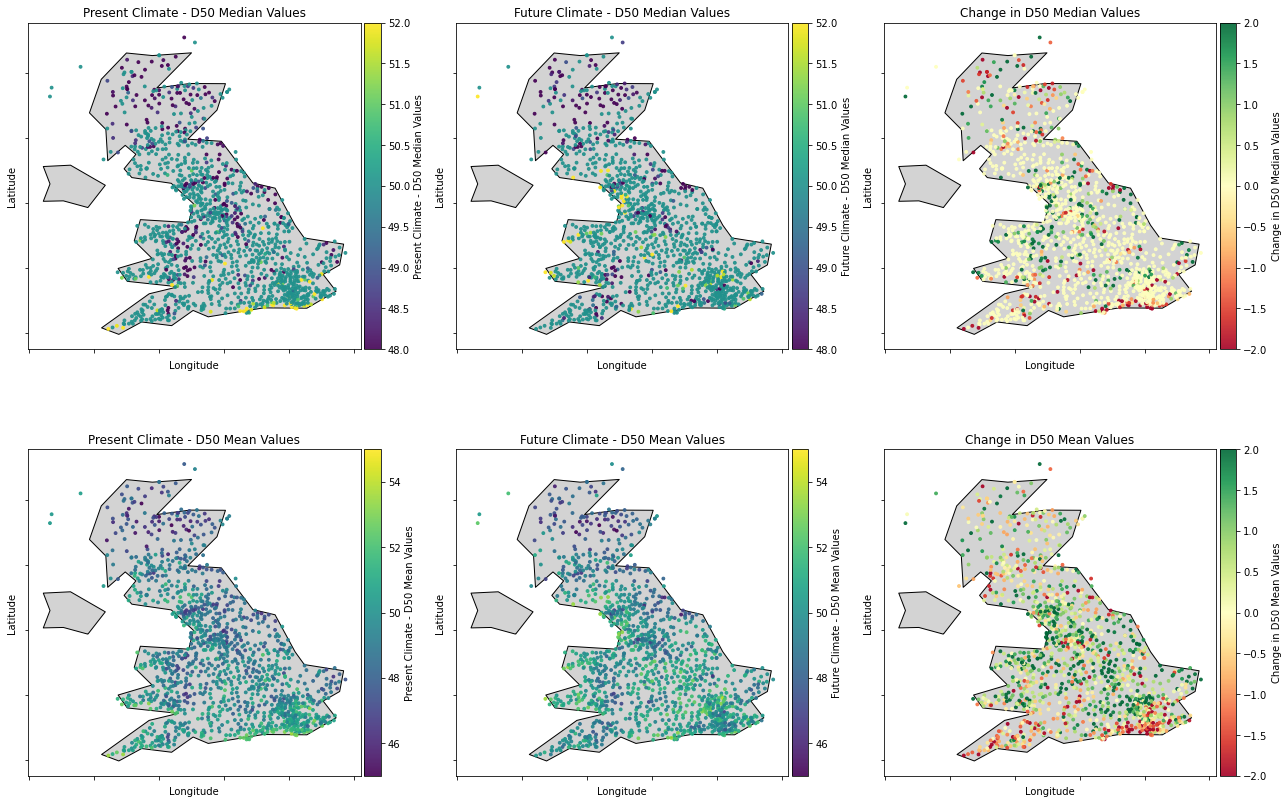

In [19]:
# Create a figure and axes for the six subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Present Climate 
present_medianD50_data = df_changes_all[['gauge_num', 'D50_median_present']].copy()
present_medianD50_data['Climate'] = 'present'  # Add a Climate column for clarity
# Future Climate
future_medianD50_data = df_changes_all[['gauge_num', 'D50_median_future']].copy()
future_medianD50_data['Climate'] = 'future'  # Add a Climate column for clarity

global_min = min(present_medianD50_data['D50_median_present'].min(),
    future_medianD50_data['D50_median_future'].min())

global_max = max(present_medianD50_data['D50_median_present'].max(),
    future_medianD50_data['D50_median_future'].max())


plot_values_on_map(axes[0, 0], present_medianD50_data, 'Present Climate - D50 Median Values', tbo_vals,
                   'D50_median_present', 48, 52)
plot_values_on_map(axes[0, 1], future_medianD50_data, 'Future Climate - D50 Median Values', tbo_vals, 
                    'D50_median_future', 48, 52)

# # Change 
change_medianD50_data = df_changes_all[['gauge_num', 'D50_median_diff']].copy()
change_medianD50_data['Climate'] = 'change'  # Add a Climate column for clarity
plot_values_on_map(axes[0, 2], change_medianD50_data, 'Change in D50 Median Values', tbo_vals, 'D50_median_diff', 
                   vmin=-2, vmax=+2, cmap = 'RdYlGn')


present_meanD50_data = df_changes_all[['gauge_num', 'D50_mean_present']].copy()
present_meanD50_data['Climate'] = 'present'  # Add a Climate column for clarity
future_meanD50_data = df_changes_all[['gauge_num', 'D50_mean_future']].copy()
future_meanD50_data['Climate'] = 'present'  # Add a Climate column for clarity

global_min = min(present_meanD50_data['D50_mean_present'].min(),
    future_meanD50_data['D50_mean_future'].min())

global_max = max(present_meanD50_data['D50_mean_present'].max(),
    future_meanD50_data['D50_mean_future'].max())


plot_values_on_map(axes[1, 0], present_meanD50_data, 'Present Climate - D50 Mean Values', tbo_vals, 
                   'D50_mean_present', 45, 55)
plot_values_on_map(axes[1, 1], future_meanD50_data, 'Future Climate - D50 Mean Values', tbo_vals, 
                    'D50_mean_future', 45, 55)

# # Change 
change_meanD50_data = df_changes_all[['gauge_num', 'D50_mean_diff']].copy()
change_meanD50_data['Climate'] = 'change'  # Add a Climate column for clarity
plot_values_on_map(axes[1, 2], change_meanD50_data, 'Change in D50 Mean Values', tbo_vals, 'D50_mean_diff', 
                   vmin=-2, vmax=+2, cmap = 'RdYlGn')

# Adjust layout
plt.tight_layout()


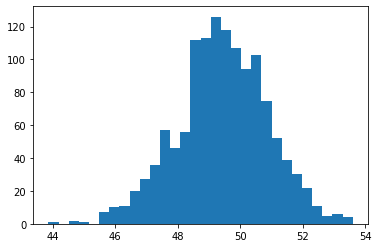

In [20]:
plt.hist(df_changes_all['D50_mean_present'], bins =30);

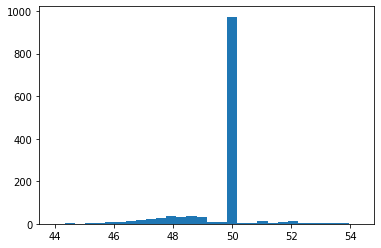

In [21]:
plt.hist(df_changes_all['D50_median_present'], bins =30);

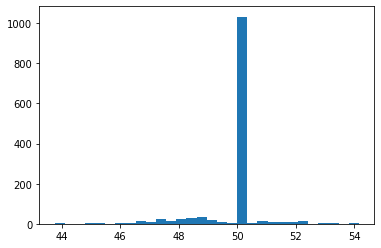

In [22]:
plt.hist(df_changes_all['D50_median_future'], bins =30);

### Try for just one duration

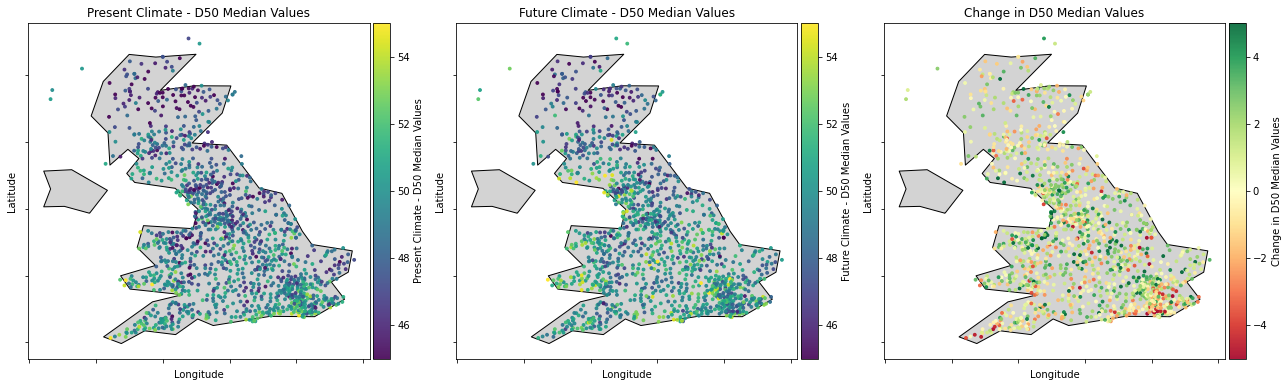

In [23]:
df_changes_1h = df_changes_byduration[df_changes_byduration['sampling_duration']==3]
the_df = df_changes_1h

# Create a figure and axes for the six subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 12))

# Present Climate 
present_medianD50_data = the_df[['gauge_num', 'D50_mean_present']].copy()
present_medianD50_data['Climate'] = 'present'  # Add a Climate column for clarity
# Future Climate
future_medianD50_data = the_df[['gauge_num', 'D50_mean_future']].copy()
future_medianD50_data['Climate'] = 'future'  # Add a Climate column for clarity

global_min = min(present_medianD50_data['D50_mean_present'].min(),
    future_medianD50_data['D50_mean_future'].min())
global_max = max(present_medianD50_data['D50_mean_present'].max(),
    future_medianD50_data['D50_mean_future'].max())


plot_values_on_map(axes[0], present_medianD50_data, 'Present Climate - D50 Median Values', tbo_vals,
                   'D50_mean_present', 45, 55)
plot_values_on_map(axes[1], future_medianD50_data, 'Future Climate - D50 Median Values', tbo_vals, 
                    'D50_mean_future', 45, 55)

# # Change 
change_medianD50_data = the_df[['gauge_num', 'D50_mean_diff']].copy()
change_medianD50_data['Climate'] = 'change'  # Add a Climate column for clarity
plot_values_on_map(axes[2], change_medianD50_data, 'Change in D50 Median Values', tbo_vals, 'D50_mean_diff', 
                   vmin=-5, vmax=+5, cmap = 'RdYlGn')

plt.tight_layout()


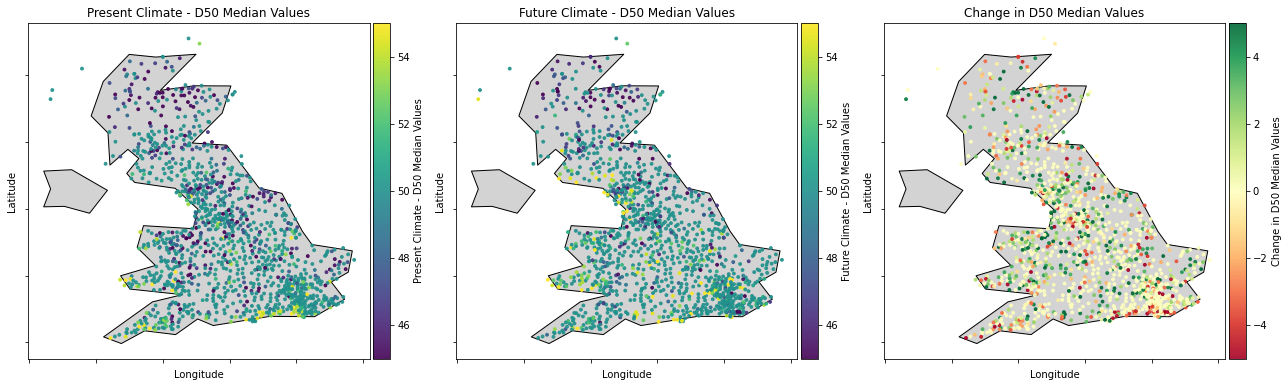

In [24]:
df_changes_1h = df_changes_byduration[df_changes_byduration['sampling_duration']==3]
the_df = df_changes_1h

# Create a figure and axes for the six subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 12))

# Present Climate 
present_medianD50_data = the_df[['gauge_num', 'D50_median_present']].copy()
present_medianD50_data['Climate'] = 'present'  # Add a Climate column for clarity
# Future Climate
future_medianD50_data = the_df[['gauge_num', 'D50_median_future']].copy()
future_medianD50_data['Climate'] = 'future'  # Add a Climate column for clarity

global_min = min(present_medianD50_data['D50_median_present'].min(),
    future_medianD50_data['D50_median_future'].min())
global_max = max(present_medianD50_data['D50_median_present'].max(),
    future_medianD50_data['D50_median_future'].max())


plot_values_on_map(axes[0], present_medianD50_data, 'Present Climate - D50 Median Values', tbo_vals,
                   'D50_median_present', 45, 55)
plot_values_on_map(axes[1], future_medianD50_data, 'Future Climate - D50 Median Values', tbo_vals, 
                    'D50_median_future', 45, 55)

# # Change 
change_medianD50_data = the_df[['gauge_num', 'D50_median_diff']].copy()
change_medianD50_data['Climate'] = 'change'  # Add a Climate column for clarity
plot_values_on_map(axes[2], change_medianD50_data, 'Change in D50 Median Values', tbo_vals, 'D50_median_diff', 
                   vmin=-5, vmax=+5, cmap = 'RdYlGn')

plt.tight_layout()


## Present day variation, split by duration
### Mean

In [25]:
# Define the unique durations to iterate over
durations = df_changes_byduration['sampling_duration'].unique()
durations = ['1', '2', '3', '6', '12', '24']

In [26]:
# D50_mean_present
for duration in durations:
    h_1 = df_changes_byduration[df_changes_byduration['sampling_duration'] ==float(duration)]
    print(h_1["D50_mean_present"].mean())

48.989214728833566
49.086497926239616
48.85351839739921
49.22202274533821
49.48010235993955
49.072176821147465


In [27]:
# fig_D50 = plt.figure(figsize=(18, 12))
# D50_axes = fig_D50.subplots(2, 3).flatten()  # Flatten the 2x4 grid into a 1D array

# # Plot for each duration for theta
# for i, duration in enumerate(durations):
#     ax = D50_axes[i]  # Access the flattened array
#     plot_change_variable_for_duration(ax, 'D50_mean_present', duration, df_changes_byduration, tbo_vals, cmap='RdYlGn')
# #     plot_change_D50_for_duration(ax, duration,'D50_mean', present_df, tbo_vals)

# # Adjust layout for theta figure
# plt.suptitle('Mean D50 by Duration', fontsize=16)
# # plt.subplots_adjust(top=0.9)  # Adjust title position
# plt.tight_layout()
# plt.show()

### Median

In [29]:
df_changes_byduration

gauge_num  theta_mean_present  D_mean_present  R_present  \
0             0            3.500241      203.473684   0.717437   
1             1            3.677620      213.785000   0.646488   
2             2            3.639529      211.570681   0.660679   
3             3            3.656878      212.579208   0.717772   
4             4            3.564715      207.221649   0.677804   
...         ...                 ...             ...        ...   
9032       1289            4.110125      238.927083   0.465752   
9033       1290            3.804880      221.182759   0.333856   
9034       1291            3.518327      204.525097   0.313800   
9035       1292            3.758120      218.464539   0.289248   
9036       1293            3.697365      214.932773   0.345675   

      D50_mean_present  D50_median_present  theta_mean_future  D_mean_future  \
0            51.921067           50.000000           3.583900     208.336898   
1            46.571246           50.000000           4.116665     239.307292   
2            49.958588           50.000000           3.853725     224.022222   
3            48.239167           50.000000           3.773216     219.342105   
4            44.838127           49.025974           3.804889     221.183333   
...                ...                 ...                ...            ...   
9032         48.299422           49.073756           3.925940     228.220149   
9033         50.885115           50.000000           3.699391     215.050584   
9034         48.689064           47.826087           3.891858     226.238938   
9035         48.927505           50.000000           3.850144     223.814050   
9036         49.915405           48.730159           3.410321     198.246512   

      R_future  D50_mean_future  D50_median_future  theta_mean_diff  \
0     0.648224        49.957444          50.000000         0.083659   
1     0.550992        50.521153          50.000000         0.439045   
2     0.579888        50.021940          50.000000         0.214197   
3     0.504787        49.591393          50.000000         0.116338   
4     0.495909        51.054433          50.000000         0.240175   
...        ...              ...                ...              ...   
9032  0.378251        49.319835          48.193548        -0.184185   
9033  0.429753        51.004817          50.724638        -0.105488   
9034  0.397336        44.505337          43.636364         0.373531   
9035  0.343960        50.090251          48.957881         0.092025   
9036  0.202223        50.198907          50.000000        -0.287044   

      D_mean_diff    R_diff  D50_mean_diff  D50_median_diff  sampling_duration  
0        4.863214 -0.069213      -1.963623         0.000000           0.500000  
1       25.522292 -0.095495       3.949907         0.000000           0.500000  
2       12.451542 -0.080791       0.063352         0.000000           0.500000  
3        6.762897 -0.212985       1.352226         0.000000           0.500000  
4       13.961684 -0.181895       6.216306         0.974026           0.500000  
...           ...       ...            ...              ...                ...  
9032   -10.706934 -0.087501       1.020413        -0.880208          24.000000  
9033    -6.132175  0.095897       0.119702         0.724638          24.000000  
9034    21.713842  0.083536      -4.183727        -4.189723          24.000000  
9035     5.349511  0.054713       1.162746        -1.042119          24.000000  
9036   -16.686261 -0.143452       0.283502         1.269841          24.000000  

[9037 rows x 17 columns]

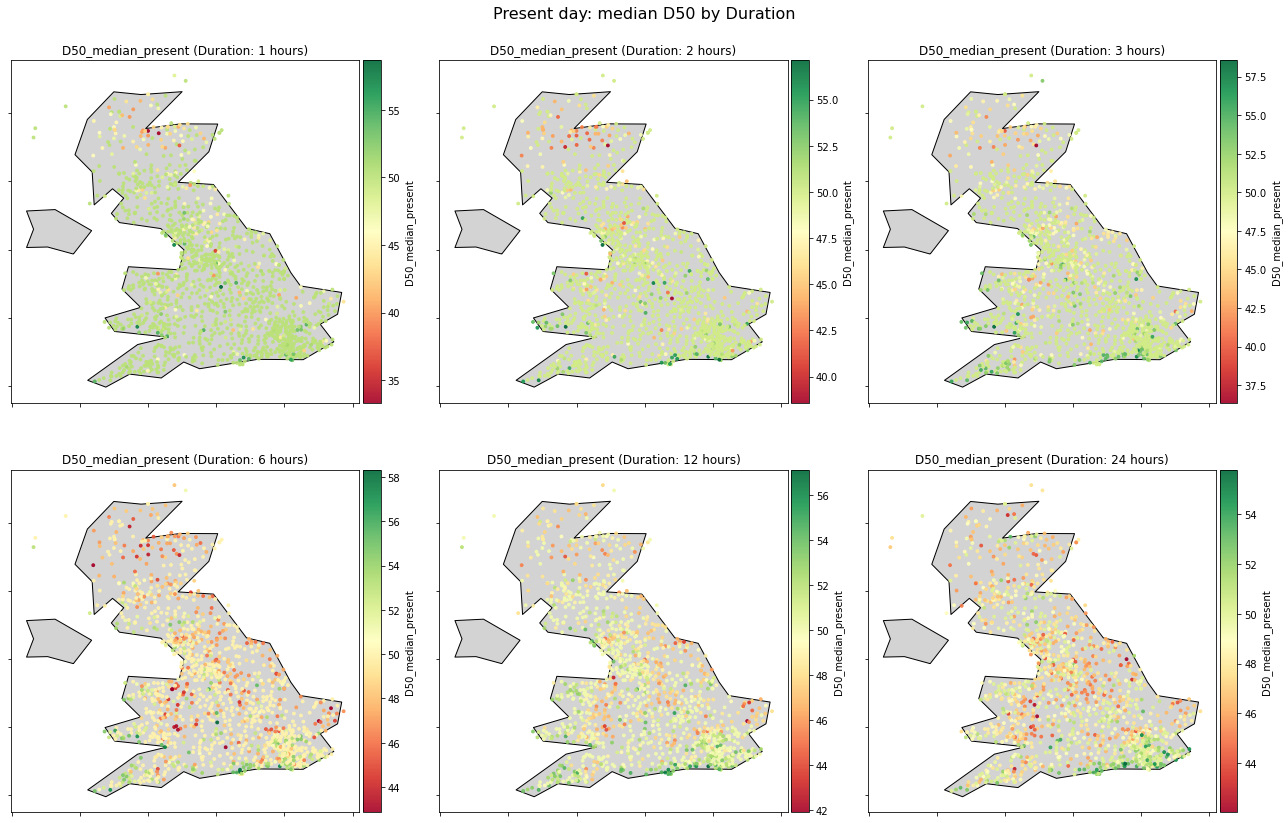

In [31]:
fig_D50 = plt.figure(figsize=(18, 12))
D50_axes = fig_D50.subplots(2, 3).flatten()  # Flatten the 2x4 grid into a 1D array

# Plot for each duration for theta
for i, duration in enumerate(durations):
    ax = D50_axes[i]  # Access the flattened array
    plot_change_variable_for_duration(ax, 'D50_median_present', duration, df_changes_byduration, tbo_vals, cmap='RdYlGn')
#     plot_change_D50_for_duration(ax, duration,'D50_mean', present_df, tbo_vals)

# Adjust layout for theta figure
plt.suptitle('Present day: median D50 by Duration', fontsize=16)
# plt.subplots_adjust(top=0.9)  # Adjust title position
plt.tight_layout()
plt.show()

## Change from present to future, split by duration

In [32]:
# Define the custom colormap: two colors for the condition
cmap = mcolors.ListedColormap(['blue', 'red'])  # Blue for < 50, Red for >= 50
bounds = [0, 0.5, 1]  # Define boundaries for the colors
norm = mcolors.BoundaryNorm(bounds, cmap.N)

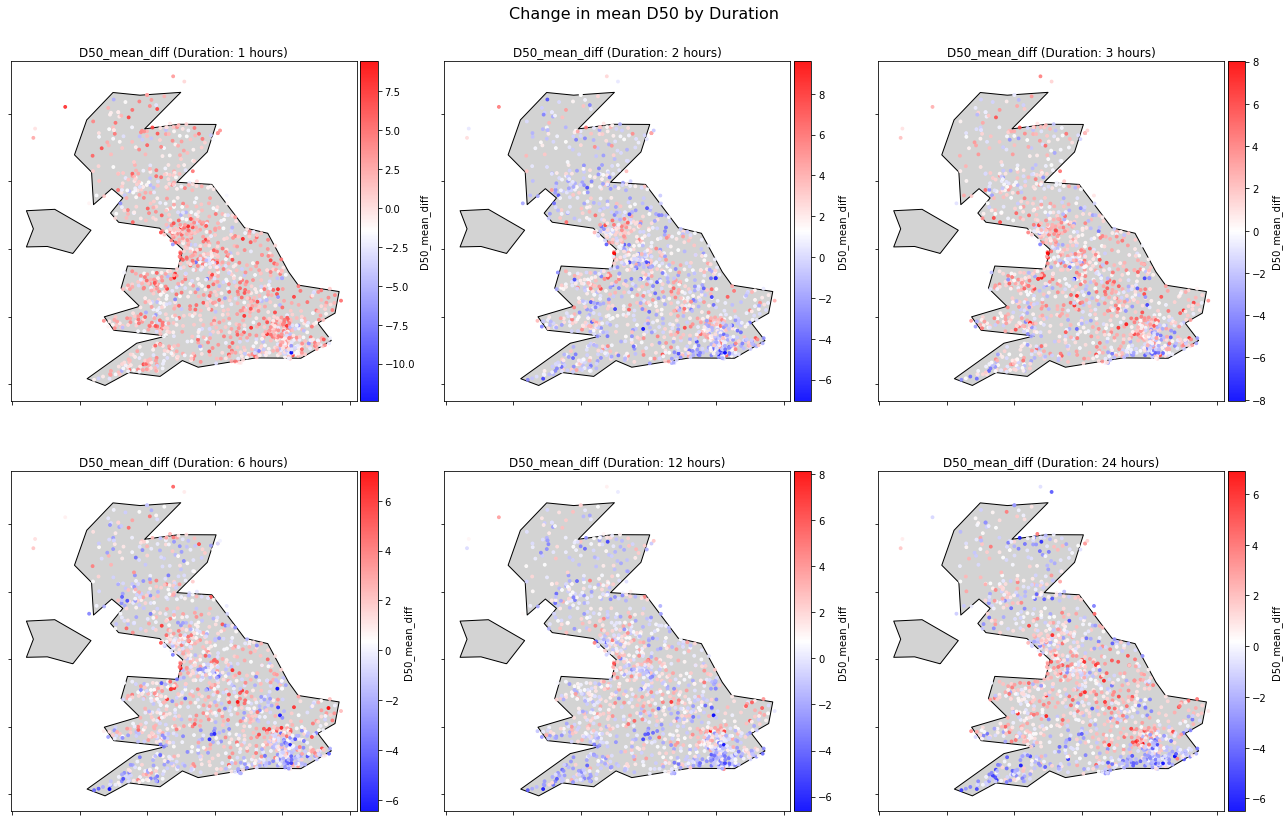

In [33]:
fig_D50 = plt.figure(figsize=(18, 12))
D50_axes = fig_D50.subplots(2, 3).flatten()  # Flatten the 2x4 grid into a 1D array

# Plot for each duration for theta
for i, duration in enumerate(durations):
    ax = D50_axes[i]  # Access the flattened array
    plot_change_variable_for_duration(ax, 'D50_mean_diff', duration, df_changes_byduration, tbo_vals, cmap='bwr')

# Adjust layout for theta figure
plt.suptitle('Change in mean D50 by Duration', fontsize=16)
# plt.subplots_adjust(top=0.9)  # Adjust title position
plt.tight_layout()
plt.show()

## Comparing methods

In [34]:
df_long = df_long.sort_values('Loading_profile_molly')
df_long = df_long.sort_values('Loading_profile_molly', key=lambda s: s.apply(['F2', 'F1', 'C', 'B1', 'B2'].index), ignore_index=True)
present = present.sort_values('Loading_profile_molly', key=lambda s: s.apply(['F2', 'F1', 'C', 'B1', 'B2'].index), ignore_index=True)
future = future.sort_values('Loading_profile_molly', key=lambda s: s.apply(['F2', 'F1', 'C', 'B1', 'B2'].index), ignore_index=True)

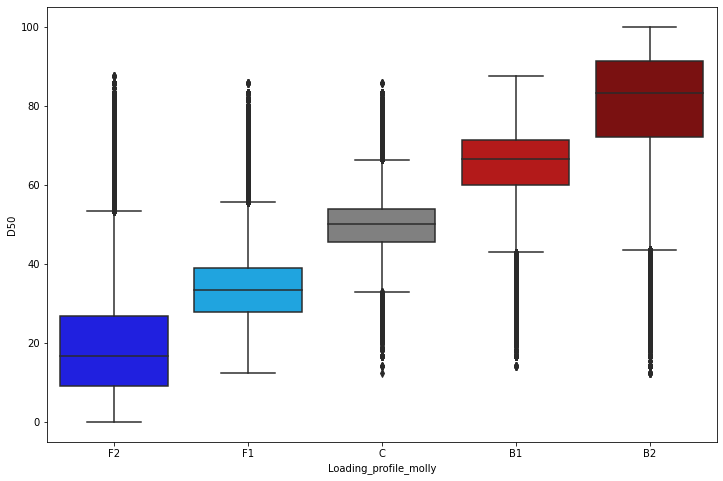

In [36]:
fig, axs = plt.subplots(figsize=(12,8))
plot_boxplot(df_long[['Loading_profile_molly', 'D50']], axs, color_mapping)
plt.show()

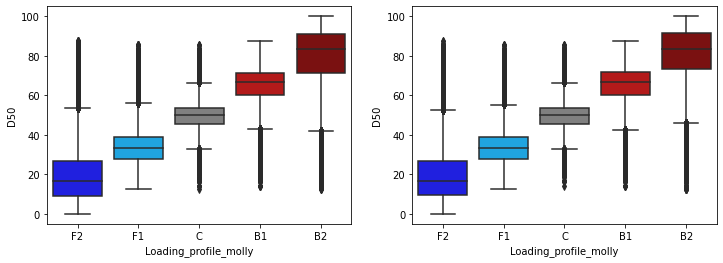

In [37]:
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
plot_boxplot(present[['Loading_profile_molly', 'D50']], axs[0], color_mapping)
plot_boxplot(future[['Loading_profile_molly', 'D50']], axs[1], color_mapping)
plt.show()

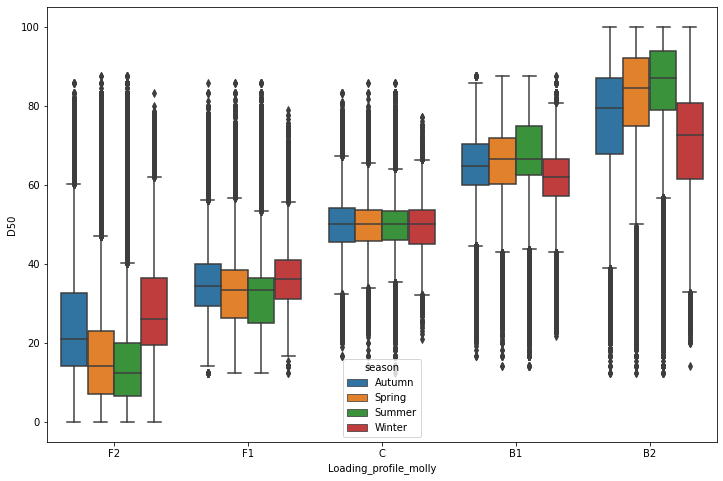

In [38]:
fig, axs = plt.subplots(figsize=(12,8))
plot_boxplot_by_season(df_long[['Loading_profile_molly', 'D50', 'season']], axs)
plt.show()

# D50 against Day of Year

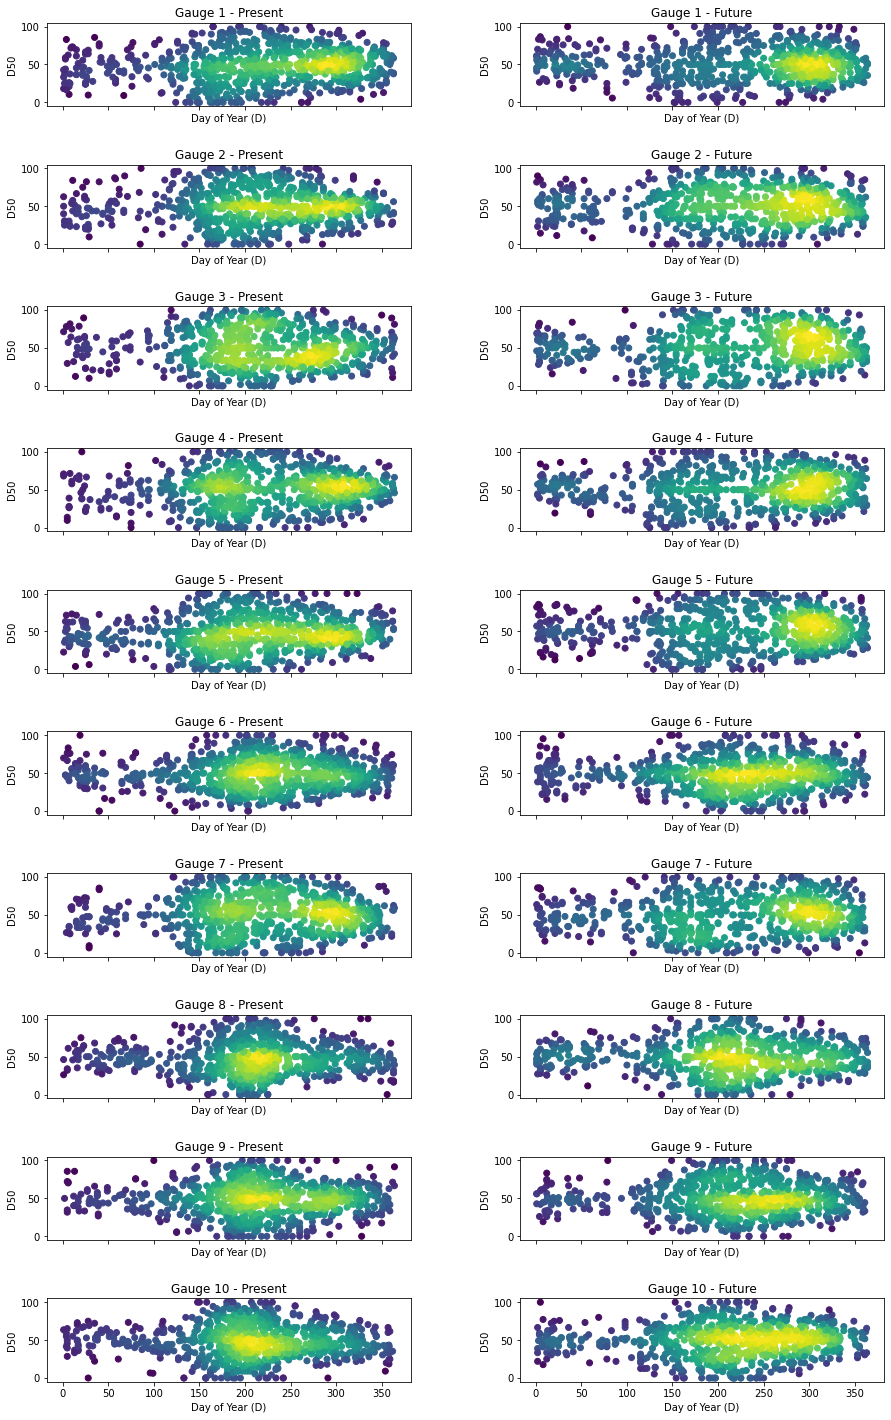

In [39]:
# Create a 10x2 subplot (10 rows, 2 columns)
fig, axs = plt.subplots(10, 2, figsize=(15, 25), sharex='col')
fig.subplots_adjust(hspace=0.7, wspace=0.3)  # Adjust space between plots

# Loop through gauge numbers from 1 to 10
for i, gauge_num in enumerate(range(1, 11)):
    
    # Filter data for the specific gauge number in 'present' dataset
    one_gauge_present = present[present['gauge_num'] == gauge_num]
    
    # Filter data for the specific gauge number in 'future' dataset
    one_gauge_future = future[future['gauge_num'] == gauge_num]
    
    # First column: Plot using the 'present' dataset
    ax_present = axs[i, 0]  # Access the correct subplot
    if not one_gauge_present.empty:
        one_gauge_present = one_gauge_present[['D', 'D50']]
        
        # Calculate point density using Gaussian KDE
        kde_present = stats.gaussian_kde(one_gauge_present.T)
        
        # Calculate density for each point
        density_present = kde_present(one_gauge_present.T)
        
        # Create a scatter plot for 'present' data with density-based coloring
        scatter_present = ax_present.scatter(one_gauge_present['D'], one_gauge_present['D50'], c=density_present, cmap='viridis', edgecolor=None)
    
    # Set title and labels for the 'present' plot
    ax_present.set_title(f'Gauge {gauge_num} - Present')
    ax_present.set_xlabel('Day of Year (D)')
    ax_present.set_ylabel('D50')

    # Second column: Plot using the 'future' dataset
    ax_future = axs[i, 1]  # Access the correct subplot
    if not one_gauge_future.empty:
        one_gauge_future = one_gauge_future[['D', 'D50']]
        
        # Calculate point density using Gaussian KDE
        kde_future = stats.gaussian_kde(one_gauge_future.T)
        
        # Calculate density for each point
        density_future = kde_future(one_gauge_future.T)
        
        # Create a scatter plot for 'future' data with density-based coloring
        scatter_future = ax_future.scatter(one_gauge_future['D'], one_gauge_future['D50'], c=density_future, cmap='viridis', edgecolor=None)

    # Set title and labels for the 'future' plot
    ax_future.set_title(f'Gauge {gauge_num} - Future')
    ax_future.set_xlabel('Day of Year (D)')
    ax_future.set_ylabel('D50')

# Add a colorbar for the last plot (adjust as needed)
# cbar = fig.colorbar(scatter_future, ax=axs, orientation='vertical', fraction=0.02, pad=0.02)
# cbar.set_label('Density')

# Display the plot
plt.show()


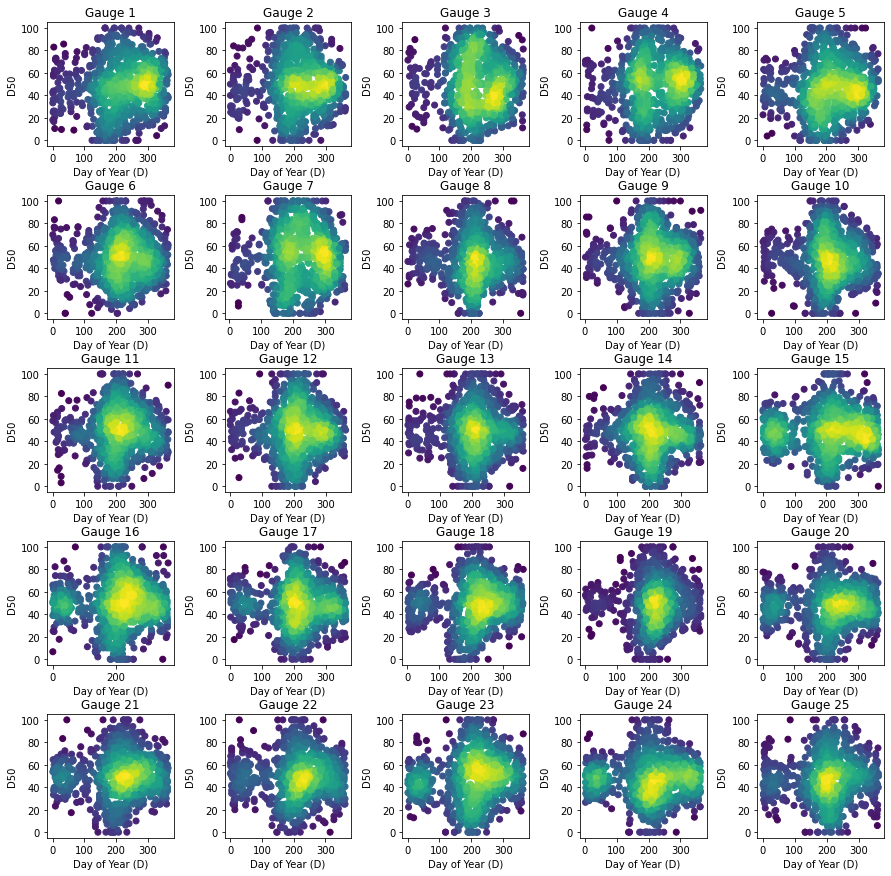

In [40]:
# Create a 5x5 subplot
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust space between plots

# Loop through gauge numbers from 1 to 25 (row and column indices)
for gauge_num, ax in enumerate(axs.flat, start=1):
    
    # Filter data for the specific gauge number
    one_gauge = present[present['gauge_num'] == gauge_num]
    
    # Check if there's any data for this gauge number
    if not one_gauge.empty:
        one_gauge = one_gauge[['D', 'D50']]
        
        # Calculate point density using Gaussian KDE
        kde = stats.gaussian_kde(one_gauge.T)  # Transpose to have dimensions (2, n_points)
        
        # Calculate density for each point
        density = kde(one_gauge.T)  # Evaluate the KDE at the original data points
        
        # Create a scatter plot with colors based on density
        scatter = ax.scatter(one_gauge['D'], one_gauge['D50'], c=density, cmap='viridis', edgecolor=None)
    
    # Set title and labels for each subplot
    ax.set_title(f'Gauge {gauge_num}')
    ax.set_xlabel('Day of Year (D)')
    ax.set_ylabel('D50')
    
# Display the plot
plt.show()


In [53]:
h1 = df_long[df_long['dur_for_which_this_is_amax'].apply(
    lambda x: isinstance(x, list) and str(1) in x or x == str(1))]
h05 = df_long[df_long['dur_for_which_this_is_amax'].apply(
    lambda x: isinstance(x, list) and str(1) in x or x == str(0.5))]

h2 = df_long[df_long['dur_for_which_this_is_amax'].apply(
    lambda x: isinstance(x, list) and str(1) in x or x == str(2))]
h3 = df_long[df_long['dur_for_which_this_is_amax'].apply(
    lambda x: isinstance(x, list) and str(1) in x or x == str(3))]
h6 = df_long[df_long['dur_for_which_this_is_amax'].apply(
    lambda x: isinstance(x, list) and str(1) in x or x == str(6))]
h12 = df_long[df_long['dur_for_which_this_is_amax'].apply(
    lambda x: isinstance(x, list) and str(1) in x or x == str(12))]
h24 = df_long[df_long['dur_for_which_this_is_amax'].apply(
    lambda x: isinstance(x, list) and str(1) in x or x == str(24))]

Text(0, 0.5, 'D50')

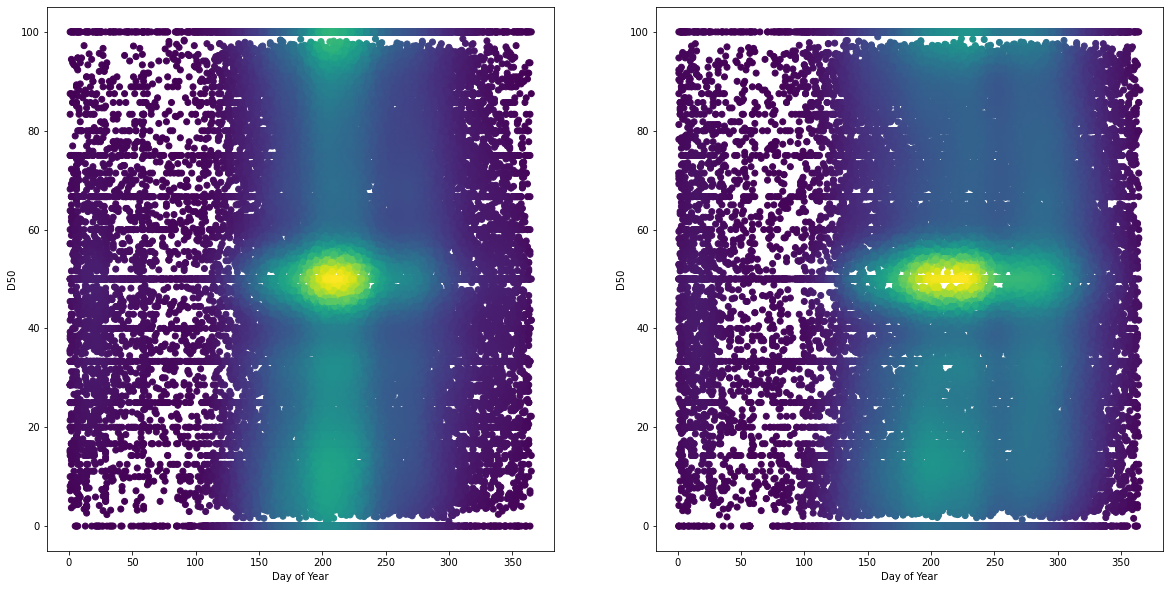

In [61]:
# Create a scatter plot with colors based on density
fig, axs = plt.subplots(ncols=2, figsize=(20,10))

test = h05[['D', 'D50', 'Climate']]
present_h24 =test[test['Climate']=='Present'][['D', 'D50']]
future_h24 =test[test['Climate']=='Future'][['D', 'D50']]

# Calculate point density using Gaussian KDE
kde_present = stats.gaussian_kde(present_h24.T)  # Transpose to have dimensions (2, n_points)
kde_future = stats.gaussian_kde(future_h24.T)  # Transpose to have dimensions (2, n_points)

# Calculate density for each point
density_present = kde_present(present_h24.T)  # Evaluate the KDE at the original data points
density_future = kde_future(future_h24.T)  # Evaluate the KDE at the original data points

scatter_pres = axs[0].scatter(present_h24['D'], present_h24['D50'], c=density_present, cmap='viridis', edgecolor=None)
scatter_fut = axs[1].scatter(future_h24['D'], future_h24['D50'], c=density_future, cmap='viridis', edgecolor=None)

axs[0].set_xlabel('Day of Year')
axs[1].set_xlabel('Day of Year')

axs[0].set_ylabel('D50')
axs[1].set_ylabel('D50')

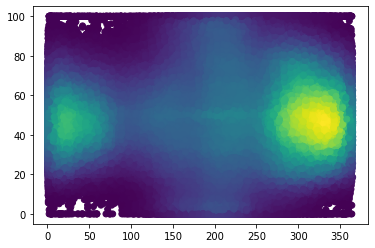

In [55]:
test = h24[['D', 'D50']]

# Calculate point density using Gaussian KDE
kde = stats.gaussian_kde(test.T)  # Transpose to have dimensions (2, n_points)

# Calculate density for each point
density = kde(test.T)  # Evaluate the KDE at the original data points

# Create a scatter plot with colors based on density
fig, ax = plt.subplots()
scatter = ax.scatter(test['D'], test['D50'], c=density, cmap='viridis', edgecolor=None)

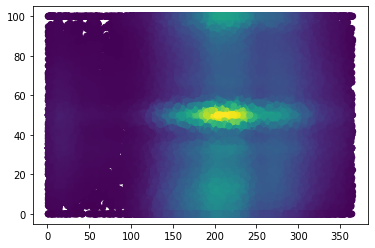

In [52]:
test = h05[['D', 'D50']]

# Calculate point density using Gaussian KDE
kde = stats.gaussian_kde(test.T)  # Transpose to have dimensions (2, n_points)

# Calculate density for each point
density = kde(test.T)  # Evaluate the KDE at the original data points

# Create a scatter plot with colors based on density
fig, ax = plt.subplots()
scatter = ax.scatter(test['D'], test['D50'], c=density, cmap='viridis', edgecolor=None)

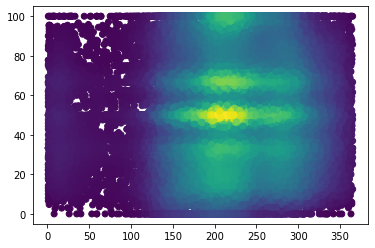

In [49]:
test = h1[['D', 'D50']]

# Calculate point density using Gaussian KDE
kde = stats.gaussian_kde(test.T)  # Transpose to have dimensions (2, n_points)

# Calculate density for each point
density = kde(test.T)  # Evaluate the KDE at the original data points

# Create a scatter plot with colors based on density
fig, ax = plt.subplots()
scatter = ax.scatter(test['D'], test['D50'], c=density, cmap='viridis', edgecolor=None)

In [ ]:
em = df_long[df_long['D50']==100]['em'].iloc[1]
gauge_num = df_long[df_long['D50']==100]['gauge_num'].iloc[1]
time_period = df_long[df_long['D50']==100]['Climate'].iloc[1]
filename =df_long[df_long['D50']==100]['filename'].iloc[1]

indy_events_fp = home_dir2 + f"ProcessedData/IndependentEvents/UKCP18_30mins/{time_period}/{em}/{gauge_num}/WholeYear/{filename}"
d50_100 = pd.read_csv(indy_events_fp)
d50_100

In [ ]:
df_changes_by_season = df_changes_autumn

# Create a figure and axes for the six subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Present Climate 
present_medianD50_data = df_changes_by_season[['gauge_num', 'D50_median_present']].copy()
present_medianD50_data['Climate'] = 'present'  # Add a Climate column for clarity
# Future Climate
future_medianD50_data = df_changes_by_season[['gauge_num', 'D50_median_future']].copy()
future_medianD50_data['Climate'] = 'future'  # Add a Climate column for clarity

global_min = min(present_medianD50_data['D50_median_present'].min(),
    future_medianD50_data['D50_median_future'].min())

global_max = max(present_medianD50_data['D50_median_present'].max(),
    future_medianD50_data['D50_median_future'].max())


plot_values_on_map(axes[0, 0], present_medianD50_data, 'Present Climate - D50 Median Values', tbo_vals,
                   'D50_median_present', 40, 70)
plot_values_on_map(axes[0, 1], future_medianD50_data, 'Future Climate - D50 Median Values', tbo_vals, 
                    'D50_median_future', 40, 70)

# # Change 
change_medianD50_data = df_changes_by_season[['gauge_num', 'D50_median_diff']].copy()
change_medianD50_data['Climate'] = 'change'  # Add a Climate column for clarity
plot_values_on_map(axes[0, 2], change_medianD50_data, 'Change in D50 Median Values', tbo_vals, 'D50_median_diff', 
                   vmin=-30, vmax=20, cmap = 'RdYlGn')


present_meanD50_data = df_changes_by_season[['gauge_num', 'D50_mean_present']].copy()
present_meanD50_data['Climate'] = 'present'  # Add a Climate column for clarity
future_meanD50_data = df_changes_by_season[['gauge_num', 'D50_mean_future']].copy()
future_meanD50_data['Climate'] = 'present'  # Add a Climate column for clarity

global_min = min(present_meanD50_data['D50_mean_present'].min(),
    future_meanD50_data['D50_mean_future'].min())

global_max = max(present_meanD50_data['D50_mean_present'].max(),
    future_meanD50_data['D50_mean_future'].max())


plot_values_on_map(axes[1, 0], present_meanD50_data, 'Present Climate - D50 Mean Values', tbo_vals, 
                   'D50_mean_present', global_min, global_max)
plot_values_on_map(axes[1, 1], future_meanD50_data, 'Future Climate - D50 Mean Values', tbo_vals, 
                    'D50_mean_future', global_min, global_max)

# # Change 
change_meanD50_data = df_changes_by_season[['gauge_num', 'D50_mean_diff']].copy()
change_meanD50_data['Climate'] = 'change'  # Add a Climate column for clarity
plot_values_on_map(axes[1, 2], change_meanD50_data, 'Change in D50 Mean Values', tbo_vals, 'D50_mean_diff', 
                   vmin=None, vmax=None, cmap = 'RdYlGn')

# Adjust layout
plt.tight_layout()
